# Redes Neurais Artificiais 2025.1


## Implementação de Redes Neurais com Sci-Kit Learn

* Professora: Elloá B. Guedes (ebgcosta@uea.edu.br)


### Contexto: Consumo de Combustível

O objetivo desta atividade prática é utilizar as ferramentas de Machine Learning no ambiente Python com o uso das bibliotecas pandas e sci-kit learn para prever o consumo de combustível de veículos.

### Base de Dados

Disponível em: https://archive.ics.uci.edu/ml/datasets/auto+mpg

### Bibliotecas

Por hábito, a primeira célula do notebook costuma ser reservada para importação de bibliotecas.
A cada biblioteca nova acrescida, é necessário executar a célula para atualização e correta execução.

In [329]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

### Abertura do Dataset

Abra o dataset e visualize o seu cabeçalho, isto é, os primeiros exemplos nele contidos.
Isto é útil para checar se a importação foi realizada de maneira adequada e se a disposição dos dados está de acordo para os próximos passos do trabalho.

In [330]:
df = pd.read_csv('autompg.csv', sep=';')
df.head()
print(df.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'modelyear', 'origin', 'name'],
      dtype='object')


### Conhecendo o dataset

Para praticar conceitos relativos à exploração do conjunto de dados, utilize as células a seguir para prover respostas para as seguintes perguntas:

1. Quantos exemplos há no dataset?
2. Quais os atributos existentes no dataset?
3. Quais os nomes dos carros existentes no dataset?
4. Quais as características do 'chevrolet camaro'?
5. Qual a média de consumo, em galões por litro, dos carros existentes no dataset?

In [331]:
numberOfExamples = len(df)
print(f'1. Quantidade de exemplos no dataset: {numberOfExamples}')

1. Quantidade de exemplos no dataset: 406


In [332]:
attributes = df.columns.tolist()
print(f'2. Atributos existentes no dataset: {attributes}')

2. Atributos existentes no dataset: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'modelyear', 'origin', 'name']


In [333]:
carNames = df['name'].unique()
print(f'3. Nomes dos carros existentes no dataset: {carNames}')

3. Nomes dos carros existentes no dataset: ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'citroen ds-21 pallas' 'chevrolet chevelle concours (sw)'
 'ford torino (sw)' 'plymouth satellite (sw)' 'amc rebel sst (sw)'
 'dodge challenger se' "plymouth 'cuda 340" 'ford mustang boss 302'
 'chevrolet monte carlo' 'buick estate wagon (sw)' 'toyota corona mark ii'
 'plymouth duster' 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'volkswagen super beetle 117' 'plymouth satellite custom'
 'ford torino 500' 'amc matador' 'pontiac catalina brougham'
 'dodge monaco (sw)' 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrol

In [334]:
camaroFeatures = df[df['name'].str.contains('chevrolet camaro', case=False)]
print(camaroFeatures)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
400  27.0        4.0         151.0        90.0  2950.0          17.3   

     modelyear  origin              name  
400       82.0     1.0  chevrolet camaro  


In [335]:
df['km_per_liter'] = (df['mpg'] * 1.60934) / 3.78541
print(f'Média de consumo (km/l) dos carros no dataset: {df['km_per_liter'].mean():.2f}')

Média de consumo (km/l) dos carros no dataset: 10.00


### Preparação dos dados

1. Existem exemplos com dados faltantes. Para fins de simplificação, elimine-os do dataset.
2. Exclua a coluna com os nomes dos carros
3. Converta mpg para km/l sabendo que: 1 mpg  = 0.425 km/l. Utilize apenas duas casas decimais nesta conversão.
4. Remova a coluna mpg e insira a coluna kml no dataset.

In [336]:
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

df['horsepower'] = df['horsepower'].astype(float)

In [337]:
df.drop(columns=['name'], inplace=True)
df.drop(columns=['km_per_liter'], inplace=True)

In [338]:
df['kml'] = (df['mpg'] * 0.425).round(2)

In [339]:
df.drop(columns=['mpg'], inplace=True)
df.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,kml
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,7.65
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,6.38
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,7.65
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,6.80
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,7.22


### Organização dos dados para treinamento

1. Remova a coluna kml e atribua-a a uma variável Y
2. Atribua os demais valores do dataset a uma variável X
3. Efetue uma partição holdout 70/30 com o sklearn

In [340]:
Y = df['kml']
X = df.drop(columns=['kml'])

In [341]:
# Necessário importar: from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [342]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')


X_train shape: (274, 7)
X_test shape: (118, 7)
Y_train shape: (274,)
Y_test shape: (118,)


### Treinamento de um modelo de regressão linear

1. Importe o modelo da biblioteca sklearn
2. Instancie o modelo com parâmetros padrão (default)
3. Execute o algoritmo de treinamento com os dados de treino

In [343]:
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

print(f'Coeficientes do modelo: {regr.coef_}')
print(f'Intercepto: {regr.intercept_}')

Coeficientes do modelo: [-0.25018456  0.00727291 -0.00678245 -0.00266066 -0.00779461  0.33320237
  0.59253654]
Intercepto: -7.529985406709544


### Teste do modelo

Vamos observar a saída do modelo para um exemplo individual existente nos dados de treino:
* Atributos preditores: X_test[2:3]
* Atributo alvo: Y_test.iloc[2]
* Qual o resultado previsto para o modelo, dados estes atributos preditores?

In [344]:
predictedValue = regr.predict(X_test)
realValue = Y_test.iloc[2]

print(f'Valor real: {realValue}')
print(f'Valor previsto: {predictedValue[2:3]}')

Valor real: 10.16
Valor previsto: [12.92922097]


### Teste do modelo

1. Obtenha o R^2 para os dados de teste
 * Efetue a importação de r2_score do pacote sklearn.metrics
 * Trata-se de um valor no intervalo [0,1]
 * Quanto mais próximo de 1, melhor é o modelo

In [345]:
y_pred = regr.predict(X_test)
r2 = r2_score(Y_test, y_pred)

In [346]:
print(f'R² do modelo nos dados de teste: {r2}')

R² do modelo nos dados de teste: 0.8135559896678025


### Obtendo e visualizando os resíduos

Uma maneira muito comum de visualizarmos o quão bom certo modelo é para aprender determinados padrões dá-se por meio da visualização dos resíduos, isto é, da diferença entre os valores previstos e observados. Adapte o código a seguir para calcular os resíduos produzidos pelo seu modelo.

In [347]:
residuos = []
Y_predito = regr.predict(X_test)

for (y_real ,y_pred) in zip(Y_test,Y_predito):
    residuos.append((y_real - y_pred) ** 2)

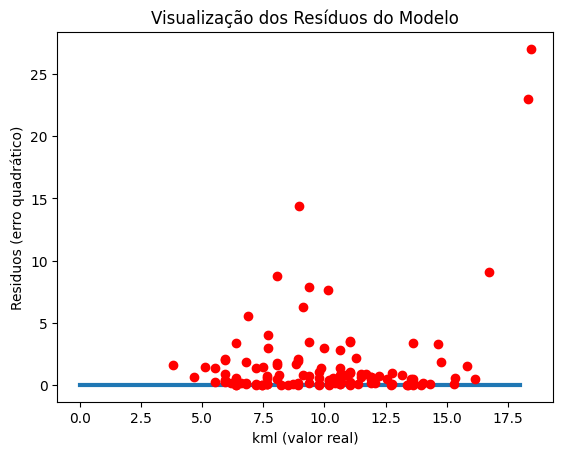

In [348]:
x = [0,int(max(Y_test))]
y = [0,0]

plt.plot(x,y,linewidth=3)
plt.plot(Y_test,residuos,'ro')
plt.ylabel('Residuos (erro quadrático)')
plt.xlabel('kml (valor real)')
plt.title('Visualização dos Resíduos do Modelo')
plt.show()

## Propondo RNAs MLP

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Proposição de uma RNA MLP de Camada Única

1. Consulte a documentação em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
2. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    2.1 Utilize a função de ativação ReLU  
    2.2 Utilize o solver Adam    
    2.3 Imprima o passo a passo do treinamento    
    2.4 Utilize o número máximo de épocas igual a 300
3. Obtenha o $R^2$ do conjunto de testes

In [349]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

mlp = MLPRegressor(
    hidden_layer_sizes=(10,),
    activation='relu',
    solver='adam',
    verbose=True,
    max_iter=300,
)

mlp.fit(X_train_std, Y_train)

y_pred_mlp = mlp.predict(X_test_std)

r2_mlp = r2_score(Y_test, y_pred_mlp)
print(f'R² da MLP no conjunto de testes: {r2_mlp}')


Iteration 1, loss = 48.56093171
Iteration 2, loss = 48.43360071
Iteration 3, loss = 48.30589384
Iteration 4, loss = 48.17548513
Iteration 5, loss = 48.04456339
Iteration 6, loss = 47.90755390
Iteration 7, loss = 47.77017521
Iteration 8, loss = 47.62554245
Iteration 9, loss = 47.47565714
Iteration 10, loss = 47.32637128
Iteration 11, loss = 47.16649513
Iteration 12, loss = 47.00532207
Iteration 13, loss = 46.83784881
Iteration 14, loss = 46.66496789
Iteration 15, loss = 46.48880921
Iteration 16, loss = 46.30825818
Iteration 17, loss = 46.12297270
Iteration 18, loss = 45.92677147
Iteration 19, loss = 45.73641201
Iteration 20, loss = 45.52905880
Iteration 21, loss = 45.32311252
Iteration 22, loss = 45.12048304
Iteration 23, loss = 44.90545548
Iteration 24, loss = 44.68673528
Iteration 25, loss = 44.46161476
Iteration 26, loss = 44.24045059
Iteration 27, loss = 44.01185897
Iteration 28, loss = 43.78134371
Iteration 29, loss = 43.54440594
Iteration 30, loss = 43.30888520
Iteration 31, loss 

c:\Users\caiob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Proposição de uma RNA MLP com duas camadas ocultas

1. Treine uma rede neural multilayer perceptron para este problema com duas camadas ocultas, com número de neurônios à sua escolha  
    2.1 Utilize a função de ativação ReLU  
    2.2 Utilize o solver Adam    
    2.3 Imprima o passo a passo do treinamento    
    2.4 Utilize o número máximo de épocas igual a 300
2. Obtenha o $R^2$ do conjunto de testes

In [350]:
mlp2 = MLPRegressor(
    hidden_layer_sizes=(20, 10),
    activation='relu',
    solver='adam',
    verbose=True,
    max_iter=300,
)

mlp2.fit(X_train_std, Y_train)

y_pred_mlp2 = mlp2.predict(X_test_std)

r2_mlp2 = r2_score(Y_test, y_pred_mlp2)
print(f'R² da MLP com duas camadas ocultas no conjunto de testes: {r2_mlp2}')

Iteration 1, loss = 59.42294106
Iteration 2, loss = 59.02259810
Iteration 3, loss = 58.61964630
Iteration 4, loss = 58.22746619
Iteration 5, loss = 57.83730554
Iteration 6, loss = 57.44508893
Iteration 7, loss = 57.05173309
Iteration 8, loss = 56.65895816
Iteration 9, loss = 56.26828734
Iteration 10, loss = 55.87016754
Iteration 11, loss = 55.47308050
Iteration 12, loss = 55.08004242
Iteration 13, loss = 54.68097490
Iteration 14, loss = 54.27907828
Iteration 15, loss = 53.87661086
Iteration 16, loss = 53.47549871
Iteration 17, loss = 53.06061495
Iteration 18, loss = 52.64937970
Iteration 19, loss = 52.24230237
Iteration 20, loss = 51.81352860
Iteration 21, loss = 51.39244509
Iteration 22, loss = 50.95754362
Iteration 23, loss = 50.51613551
Iteration 24, loss = 50.06800191
Iteration 25, loss = 49.61305334
Iteration 26, loss = 49.14352401
Iteration 27, loss = 48.66296590
Iteration 28, loss = 48.18034368
Iteration 29, loss = 47.67456633
Iteration 30, loss = 47.15923240
Iteration 31, loss 

c:\Users\caiob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Para Discussão

- Qual melhor modelo para este problema?

Acredito que depende um pouco, por exemplo, nesse problema, como o ganho de R² não é muito alto, o modelo com uma camada ou até mesmo a regressão linewar pode ser melhor por ser mais simples e rápido, mas se o Mlp com 2 camadas obtiver um R² significativamente melhor no teste sem overfitting, ele é o melhor modelo